In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp

lmin, lmax = 2, 30
zre = 8

from tools import get_spectra, lnprob_TE_ell, lnprob_EE_ell, lnprob_wish_ell, test_VG, VG
from scipy.integrate import trapz

0.9999999980059242
0.9999999977921665
0.999999996920029
0.9999999939387997
0.9999999748743813


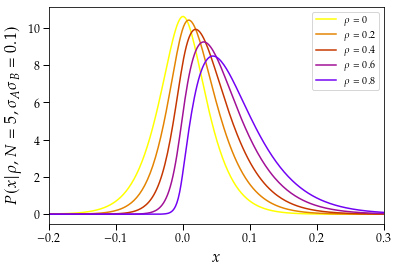

In [2]:
test_VG()
ax = plt.gca()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$P(x|\rho, N=5,\sigma_A\sigma_B=0.1)$')
ax.legend([f'$\\rho={i}$' for i in [0, 0.2, 0.4, 0.6, 0.8]], loc='best')

My understanding is that for a probability distribution function $P(\hat C_\ell|\boldsymbol\theta)$, it is legitimate to;

(a) take $P(\{\hat C_\ell\}|\boldsymbol\theta)=\prod_\ell P(\hat C_\ell|\boldsymbol\theta)$

(b) use Bayes' theorem to get $P(\boldsymbol\theta|\{\hat C_\ell\})$.

For the Wishart and gamma distribution, I didn't need to compute the normalization factor $\int P(\{\hat C_\ell\}|\boldsymbol\theta)P(\boldsymbol\theta)\,\mathrm d\{\hat C_\ell\}$. I did do the numerical integration for the cross-spectrum distribution, and it did shift the peak slightly, but it definitely did not coincide with the maximum likelihood solution.

Try getting ~10k simulations of C_l^TE and get the likelihoods for z_re for all of them.

Say we have N>>1 CMB skys where you meausure \hat C_\ell = C_\ell, what would the posterior be there? Add the log likelihoods together, and that tells you what the distribution should tend to. If there's any issue with the priors, it should go away by taking the average of many different CMB skies.

If it's not biased in that case, then it suggests the prior is having an effect. And if it's still biased, then it's not about the priors.

/home/dwatts/low-ell-reionization/tools.py:730: RuntimeWarning: invalid value encountered in true_divide
  rho = te/sigmas


Text(0, 0.5, '$P(z_\\mathrm{re}|\\{\\hat{\\boldsymbol C}_\\ell\\})$')

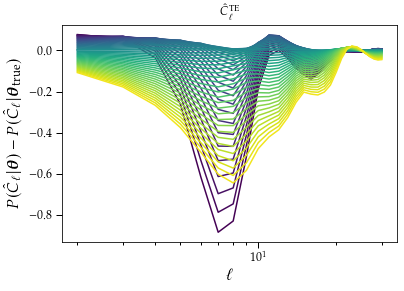

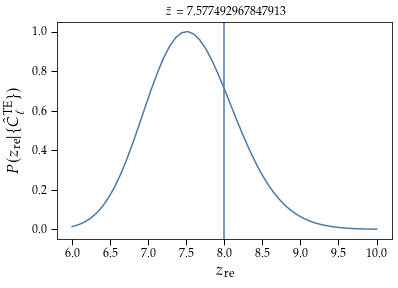

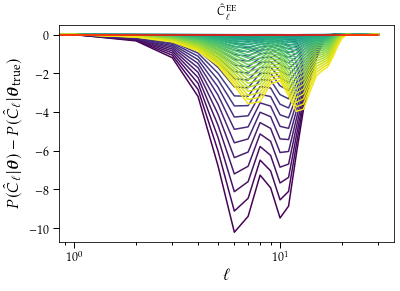

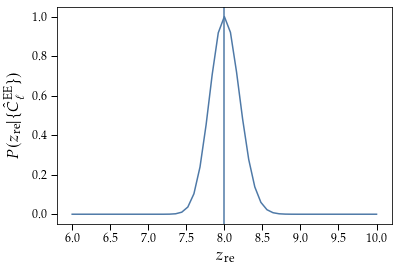

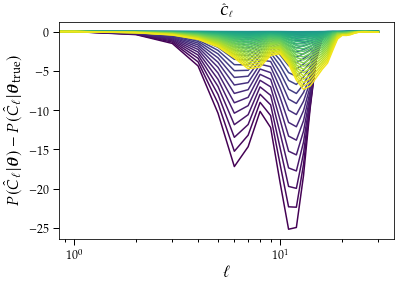

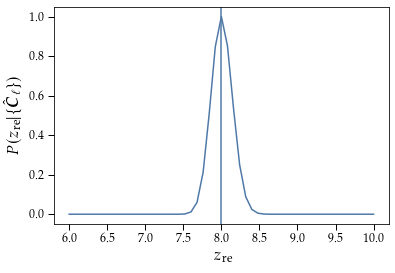

In [3]:
zres = np.linspace(6,10,51)
ell, EE, TE = get_spectra(zre, 0, lmax=lmax, spectra=True)
plt.figure()
ell = np.arange(len(TE))
lnLs = np.zeros_like(zres)
chi2_TE_True = lnprob_TE_ell(zre, 0, TE) 
for i in range(len(zres)):
    chi2_TE = lnprob_TE_ell(zres[i], 0, TE) 
    plt.plot(ell, chi2_TE - chi2_TE_True, color=plt.cm.viridis(i/len(zres)))
    lnLs[i] = sum(chi2_TE[lmin:lmax+1])
#plt.plot(ell, chi2_TE_True, color='r')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$P(\hat C_\ell|\boldsymbol\theta)-P(\hat C_\ell|\boldsymbol\theta_\mathrm{true})$')
plt.title(r'$\hat C_\ell^\mathrm{TE}$')
plt.figure()
L = np.exp(lnLs - lnLs.max())
plt.plot(zres, L)
plt.xlabel(r'$z_\mathrm{re}$')
plt.ylabel(r'$P(z_\mathrm{re}|\{\hat C_\ell^\mathrm{TE}\})$')
title = trapz(L*zres, zres)/trapz(L, zres)
plt.title(r'$\bar z={0}$'.format(title))
plt.axvline(zre)

plt.figure()
ell = np.arange(len(EE))
lnLs = np.zeros_like(zres)
for i in range(len(zres)):
    chi2_EE = lnprob_EE_ell(zres[i], 0, EE) 
    plt.plot(ell, chi2_EE, color=plt.cm.viridis(i/len(zres)))
    lnLs[i] = sum(chi2_EE[lmin:lmax+1])
chi2_EE_True = lnprob_EE_ell(zre, 0, EE) 
plt.plot(ell, chi2_EE_True, color='r')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$P(\hat C_\ell|\boldsymbol\theta)-P(\hat C_\ell|\boldsymbol\theta_\mathrm{true})$')
plt.title(r'$\hat C_\ell^\mathrm{EE}$')


plt.figure()
plt.plot(zres, np.exp(lnLs-lnLs.max()))
plt.axvline(zre)
plt.xlabel(r'$z_\mathrm{re}$')
plt.ylabel(r'$P(z_\mathrm{re}|\{\hat C_\ell^\mathrm{EE}\})$')


ell, EE, TE, TT = get_spectra(zre, 0, lmax=lmax, spectra=True, all_spectra=True)

plt.figure()
ell = np.arange(len(EE))
lnLs = np.zeros_like(zres)
for i in range(len(zres)):
    chi2_EE = lnprob_wish_ell(zres[i], 0, np.array([TT, EE, 0*EE, TE, 0*EE, 0*EE]))
    plt.plot(ell, chi2_EE, color=plt.cm.viridis(i/len(zres)))
    lnLs[i] = sum(chi2_EE[lmin:lmax+1])
#chi2_EE_True = lnprob_EE_ell(zre, 0, EE) 
#plt.plot(ell, chi2_EE_True, color='r')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$P(\hat C_\ell|\boldsymbol\theta)-P(\hat C_\ell|\boldsymbol\theta_\mathrm{true})$')
plt.title(r'$\hat {\boldsymbol C}_\ell$')

plt.figure()
plt.plot(zres, np.exp(lnLs-lnLs.max()))
plt.axvline(zre)
plt.xlabel(r'$z_\mathrm{re}$')
plt.ylabel(r'$P(z_\mathrm{re}|\{\hat{\boldsymbol C}_\ell\})$')


On an $\ell$-by-$\ell$ basis, it's clear that the TE spectrum doesn't give the maximum likelihood when the best spectrum is used, and I'm confused by this. For a few examples, I'm going to look at the distributions $P(\hat C_\ell|C_\ell)$ for different multipoles.

This is an asymmetric distribution, so it's possible that the difference between the mean and the peak causes issues...

/etc/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


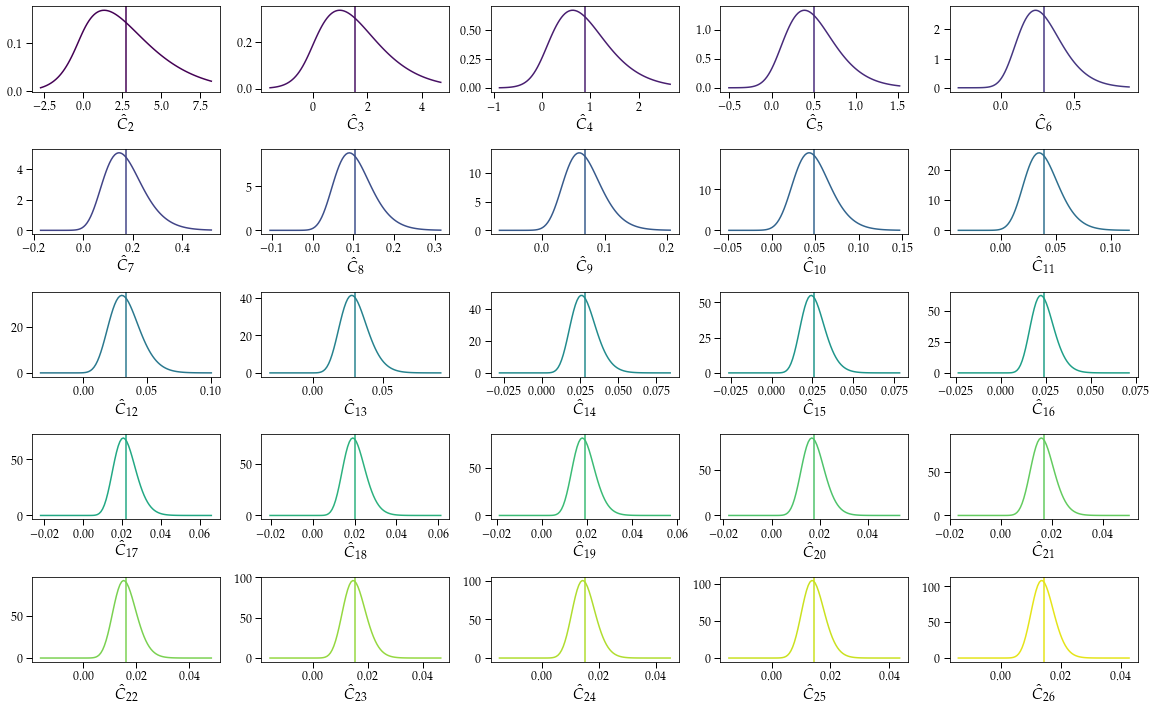

In [4]:
zres = np.linspace(6,10,51)
ell, EE, TE, TT = get_spectra(zre, 0, lmax=lmax, spectra=True, all_spectra=True)

sigmas = np.sqrt(EE*TT)
rho = TE/sigmas
N = 2*ell+1
plt.figure(figsize=(16,10))
for i in np.arange(2, 27):
    plt.subplot(5,5, i-2+1)
    Ni = N[i]
    rhoi = rho[i]
    sigmasi = sigmas[i]
    TEhats = np.linspace(-abs(TE[i]), 3*abs(TE[i]), 100)
    L = VG(TEhats, Ni, rhoi*sigmasi/Ni, sigmasi*np.sqrt(1-rhoi**2)/Ni, 0)    
    plt.plot(TEhats, L, color=plt.cm.viridis((i-2)/25))
    plt.axvline(TE[i], color=plt.cm.viridis((i-2)/25))
    plt.xlabel(f'$\hat C_{{ {i} }}$')
plt.tight_layout()

/etc/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
/etc/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in log


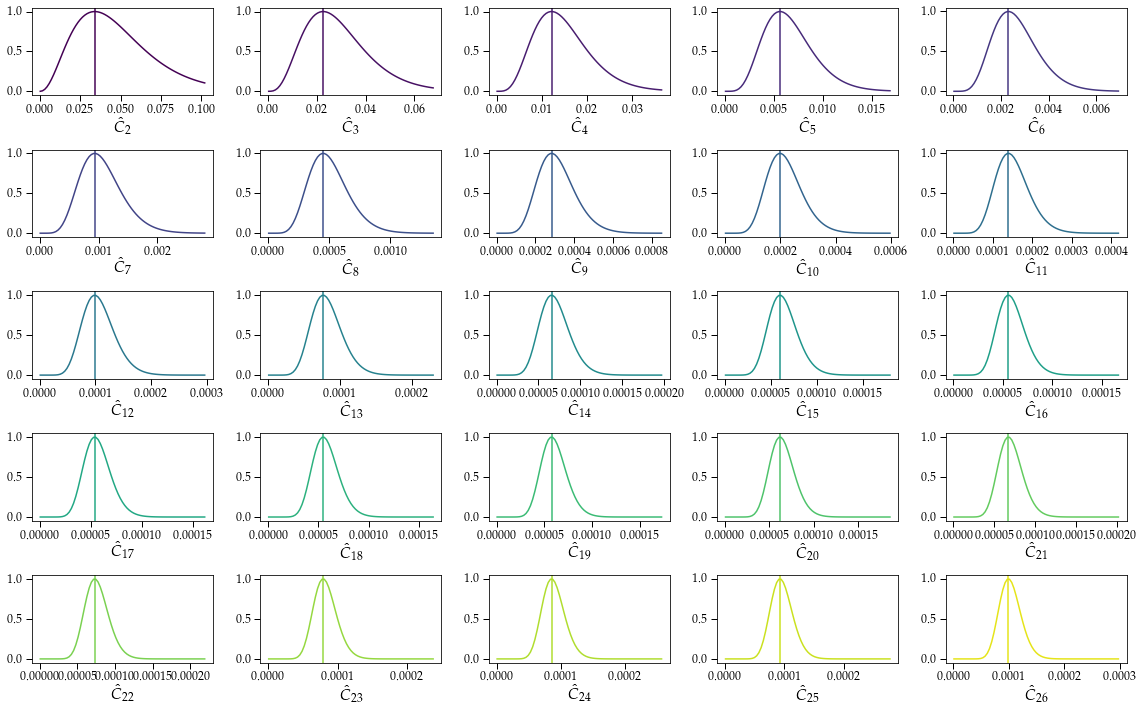

In [5]:
zres = np.linspace(6,10,51)
ell, EE, TE, TT = get_spectra(zre, 0, lmax=lmax, spectra=True, all_spectra=True)

sigmas = np.sqrt(EE*TT)
rho = TE/sigmas
N = 2*ell+1
plt.figure(figsize=(16,10))
for i in np.arange(2, 27):
    plt.subplot(5,5, i-2+1)
    li = ell[i]
    EEhats = np.linspace(-abs(EE[i]), 3*abs(EE[i]), 100)
    chi2_ell = (2*li+1)*(EEhats/EE[i] + np.log(EE[i]) - np.log(EEhats)-1)
    plt.plot(EEhats, np.exp(-chi2_ell/2), color=plt.cm.viridis((i-2)/25))
    plt.axvline(EE[i], color=plt.cm.viridis((i-2)/25))
    plt.xlabel(f'$\hat C_{{ {i} }}$')
plt.tight_layout()

/etc/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
/etc/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in log


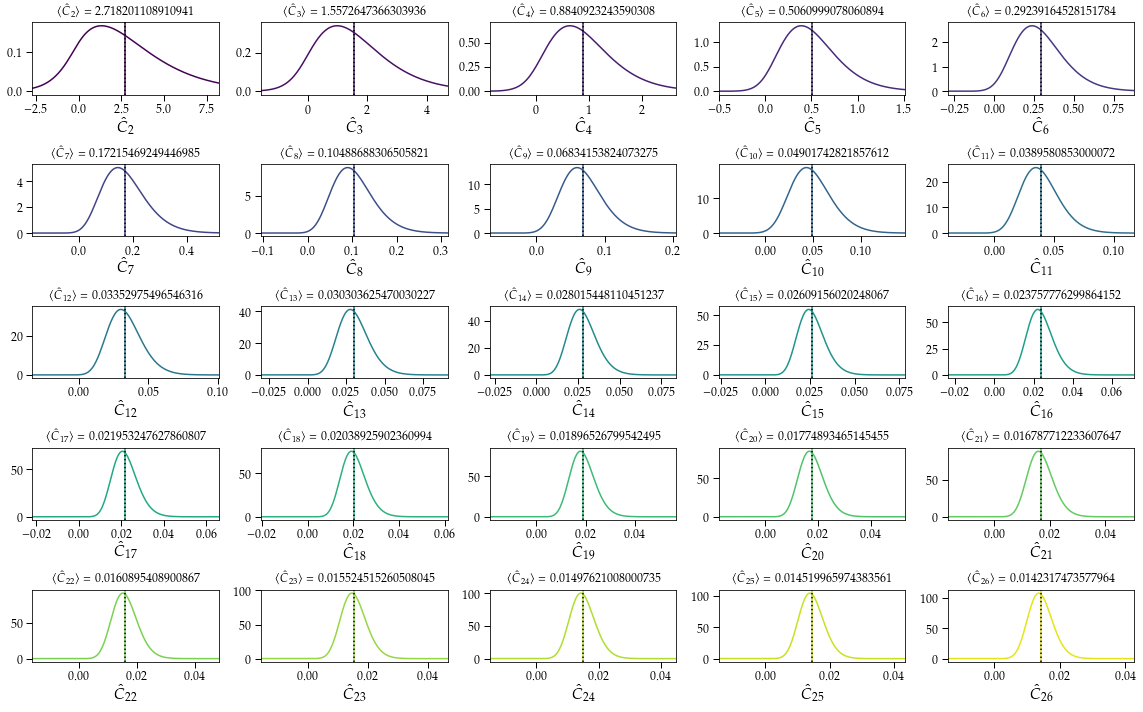

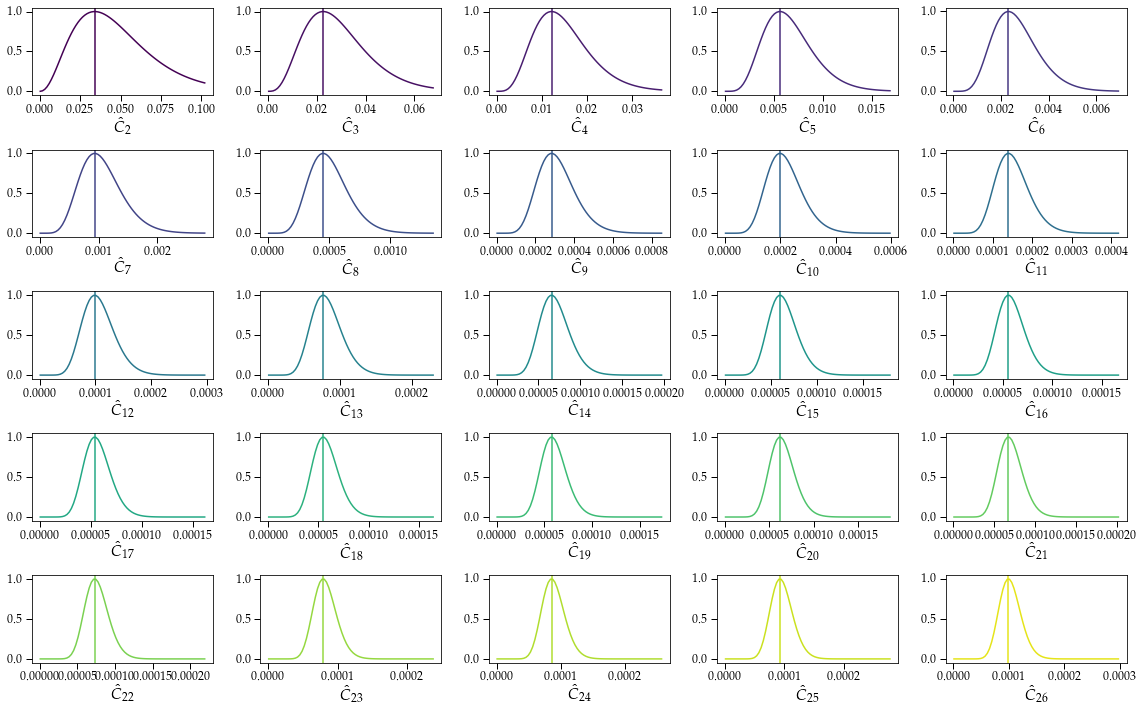

In [6]:
zres = np.linspace(6,10,51)
ell, EE, TE, TT = get_spectra(zre, 0, lmax=lmax, spectra=True, all_spectra=True)

sigmas = np.sqrt(EE*TT)
rho = TE/sigmas
N = 2*ell+1
plt.figure(figsize=(16,10))
for i in np.arange(2, 27):
    plt.subplot(5,5, i-2+1)
    Ni = N[i]
    rhoi = rho[i]
    sigmasi = sigmas[i]
    TEhats = np.linspace(-6*abs(TE[i]), 6*abs(TE[i]), 600)
    L = VG(TEhats, Ni, rhoi*sigmasi/Ni, sigmasi*np.sqrt(1-rhoi**2)/Ni, 0)    
    plt.plot(TEhats, L, color=plt.cm.viridis((i-2)/25))
    mu = trapz(L*TEhats, TEhats)/trapz(L, TEhats)
    plt.axvline(TE[i], color=plt.cm.viridis((i-2)/25))
    plt.axvline(mu, color='k', linestyle=':')
    plt.xlabel(f'$\hat C_{{ {i} }}$')
    plt.title(r'$\langle\hat C_{{{0}}}\rangle={1}$'.format(i, mu))
    plt.xlim([-abs(TE[i]), 3*abs(TE[i])])
plt.tight_layout()

plt.figure(figsize=(16,10))
for i in np.arange(2, 27):
    plt.subplot(5,5, i-2+1)
    li = ell[i]
    EEhats = np.linspace(-abs(EE[i]), 3*abs(EE[i]), 100)
    chi2_ell = (2*li+1)*(EEhats/EE[i] + np.log(EE[i]) - np.log(EEhats)-1)
    plt.plot(EEhats, np.exp(-chi2_ell/2), color=plt.cm.viridis((i-2)/25))
    plt.axvline(EE[i], color=plt.cm.viridis((i-2)/25))
    plt.xlabel(f'$\hat C_{{ {i} }}$')
plt.tight_layout()

In [7]:
Cl_th = np.array([TT, EE, 0*EE, TE])
TEhats = []
for i in range(100000):
    Cl_hat = hp.alm2cl(hp.synalm(Cl_th, new=True))
    TEhats.append(Cl_hat[3])
TEhats = np.array(TEhats)

/etc/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Dashed black line is mean of TE distribution
Solid red vertical line is input TE


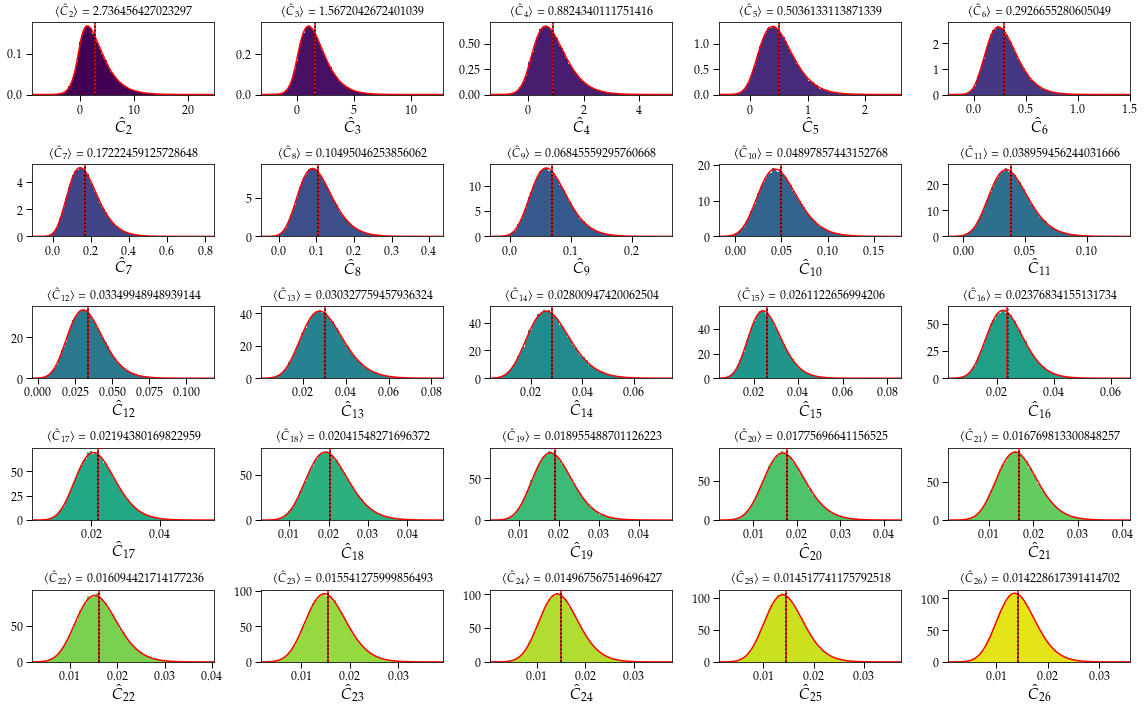

In [8]:
plt.figure(figsize=(16,10))
sigmas = np.sqrt(EE*TT)
rho = TE/sigmas
N = 2*ell+1
for i in np.arange(2, 27):
    plt.subplot(5,5, i-2+1)
    mu = TEhats[:,i].mean()
    plt.axvline(TE[i], color='r', zorder=5)
    plt.axvline(mu, color='k', linestyle=':', zorder=6)
    plt.xlabel(f'$\hat C_{{ {i} }}$')
    plt.title(r'$\langle\hat C_{{{0}}}\rangle={1}$'.format(i, mu))
    plt.xlim([TEhats[:,i].min(), TEhats[:,i].max()])
    _=plt.hist(TEhats[:,i], 100, density=True, color=plt.cm.viridis((i-2)/25))
    x = np.linspace(TEhats[:,i].min(), TEhats[:,i].max(), 1000)
    plt.plot(x, VG(x, N[i], rho[i]*sigmas[i]/N[i], sigmas[i]*np.sqrt(1-rho[i]**2)/N[i], 0),
            color='r')
plt.tight_layout()

print('Dashed black line is mean of TE distribution')
print('Solid red vertical line is input TE')


In [9]:
zres = np.linspace(4,12,101)

lnL_arr = []
lmin = 2
N = 10000
for j in range(N):
    if j % int(N*0.1) == 0:
        print(j)
    lnLs = np.zeros_like(zres)
    for i in range(len(zres)):
        chi2_TE = lnprob_TE_ell(zres[i], 0, TEhats[j]) 
        #plt.plot(ell, chi2_TE, color=plt.cm.viridis(i/len(zres)))
        lnLs[i] = sum(chi2_TE[lmin:])
    lnL_arr.append(lnLs-max(lnLs))

0


/home/dwatts/low-ell-reionization/tools.py:730: RuntimeWarning: invalid value encountered in true_divide
  rho = te/sigmas


1000
2000
3000
4000
5000
6000
7000
8000
9000


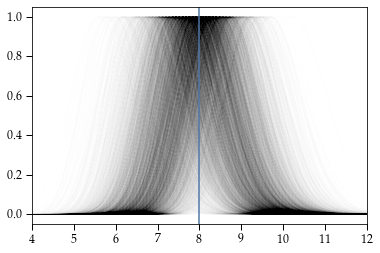

In [10]:
for i in range(len(lnL_arr)//2):
    plt.plot(zres, np.exp(lnL_arr[i]), 'k', alpha=1/256)
    plt.xlim([4, 12])
plt.axvline(8)

mean		 8.06
sd		 0.63
skew		 0.24
kurtosis	 2.94


Text(0, 0.5, '$\\langle\\mathcal L(z_\\mathrm{re}|\\hat C_\\ell^\\mathrm{TE})\\rangle$')

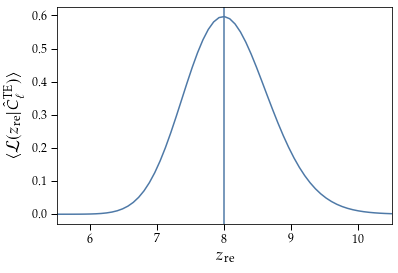

In [11]:
plt.plot(zres, np.exp(np.mean(lnL_arr, axis=0)))
plt.axvline(8)
plt.xlim([5.5, 10.5])

L = np.exp(np.mean(lnL_arr, axis=0))
print('mean\t\t', np.round(trapz(L*zres, zres)/trapz(L, zres),2))
mu = trapz(L*zres, zres)/trapz(L, zres)
var = trapz(L*zres**2, zres)/trapz(L, zres) - mu**2
print('sd\t\t', np.round(var**0.5,2))
skew = trapz(((zres-mu)/var**0.5)**3*L, zres)
kurt = trapz(((zres-mu)/var**0.5)**4*L, zres)
print('skew\t\t', np.round(skew,2))
print('kurtosis\t', np.round(kurt,2))
plt.xlabel(r'$z_\mathrm{re}$')
plt.ylabel(r'$\langle\mathcal L(z_\mathrm{re}|\hat C_\ell^\mathrm{TE})\rangle$')

(5.5, 10.5)

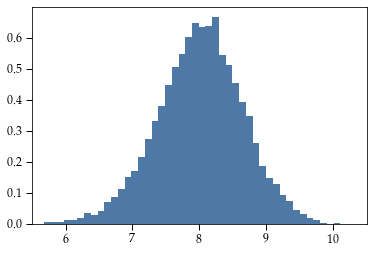

In [12]:
# histogram of means of the distributions
mus = []
for i in range(len(lnL_arr)):
    L = np.exp(lnL_arr[i])
    mus.append(trapz(L*zres, zres)/trapz(L, zres))
plt.hist(mus, 50, density=True)
plt.xlim([5.5, 10.5])